# Word Embeddings
Word Embedding is a language modelling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurence matrix, probabilistic models, etc.

# Word2Vec
Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. It utilizes two Architectures:
<ul>
<li>Continous Bag of Words (CBOW)
<li>Skip Gram

# Importing Libraries
<strong>-> NLTK</strong>
Natural Language Processing Toolkit offers a wide range of tools for NLP tasks.
<ul>
    <li><strong>sent_tokenize</strong> uses an instance of PunktSentenceTokenizer from the nltk. tokenize.punkt module. This instance has already been trained on and works well for many European languages. So it knows what punctuation and characters mark the end of a sentence and the beginning of a new sentence.
    <li><strong>word_tokenize</strong> is used for tokenizing text into words
</ul>
<strong>-> Gensim</strong>
Gensim is a robust open-source vector space modeling and topic modeling toolkit. Gensim is specifically designed to handle large text collections, using data streaming and efficient incremental algorithms, which differentiates it from most other scientific software packages that only target batch and in-memory processing.
<ul><li><strong>Word2Vec</strong> implements the word2vec family of algorithms, using highly optimized C routines, data streaming and Pythonic interfaces.</li></ul>
<strong>-> sklearn</strong>
It offers simple and efficient tools for data mining and data analysis as well as multiple machine learning algorithms.
<ul><li><strong>PCA</strong> is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.</li></ul>
<strong>-> Matplotlib</strong>
It is used for data visualization.

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
import gensim
from gensim.models import Word2Vec

In [7]:
from sklearn.decomposition import PCA

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data from the text file and ignoring the encoding erros.

In [9]:
sample = open('data.txt', 'r', errors='ignore')

In [10]:
s = sample.read()

In [11]:
f = s.replace('\n', '')

### Data[ ] is our main text corpus.

In [12]:
data = []

### Performing general data cleansing on our corpus

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eshban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
for i in sent_tokenize(f):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

# Continous Bag of Words (CBOW)
CBOW model predicts the current word given context words within specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.
<img src='img/cbow-1.png'>

In [16]:
CBOW = gensim.models.Word2Vec(data, min_count=1, size=100, window=5)

# PCA for Dimensionality Reduction

In [17]:
X = CBOW[CBOW.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Visualizing the CBOW word2vec model

In [0]:
x = []
y = []
for value in result:
    x.append(value[0])
    y.append(value[1])

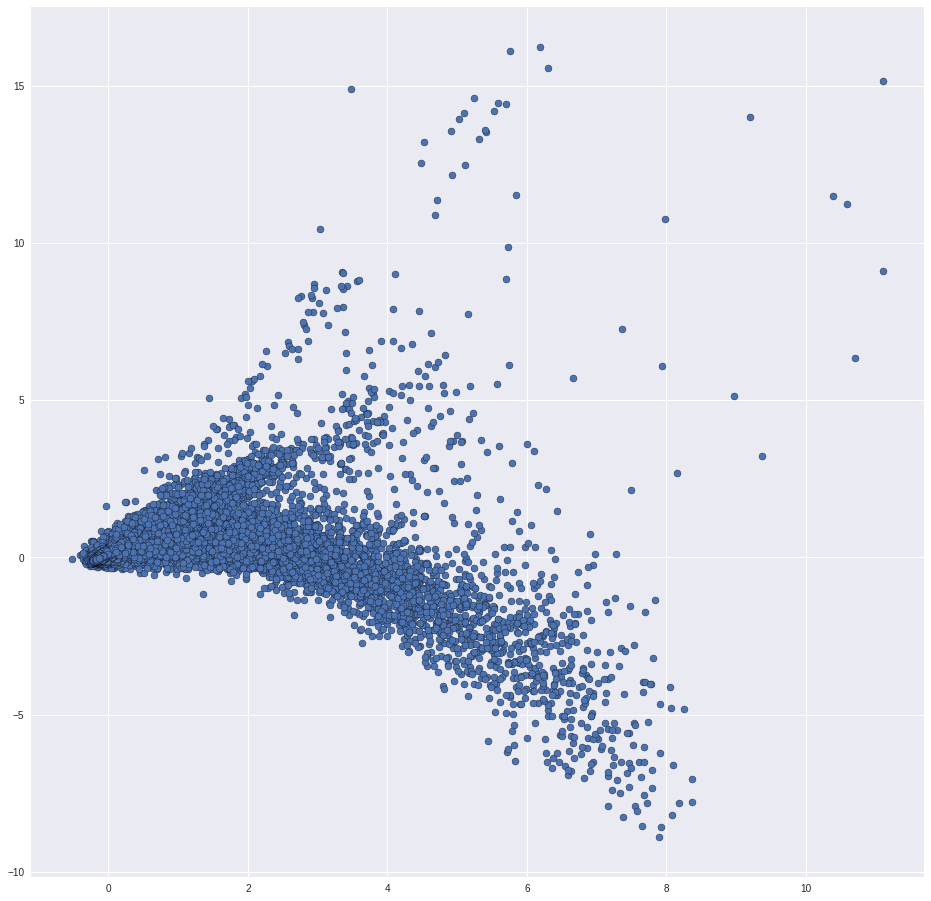

In [18]:
plt.figure(figsize=(16,16))
plt.scatter(x, y, edgecolors='black')
words = list(CBOW.wv.vocab)
plt.show()

# Top 10 most similar words

In [18]:
w1 = ['depression']

In [19]:
CBOW.wv.most_similar(positive=w1, topn=10)

[('anxiety', 0.9016313552856445),
 ('schizophrenia', 0.8688801527023315),
 ('disorder', 0.8593257665634155),
 ('mood', 0.8560002446174622),
 ('stress', 0.8492051362991333),
 ('depressive', 0.8476072549819946),
 ('illness', 0.8462103605270386),
 ('psychotic', 0.823327898979187),
 ('disorders', 0.8148031234741211),
 ('diagnosis', 0.8058203458786011)]

# Skip Gram
Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.
<img src='img/skip_gram.png'>

In [20]:
skip_gram = gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=1)

# PCA for Dimensionality Reduction

In [21]:
X = skip_gram[skip_gram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Visualizing the skip gram wrod2vec model

In [0]:
x = []
y = []
for value in result:
    x.append(value[0])
    y.append(value[1])

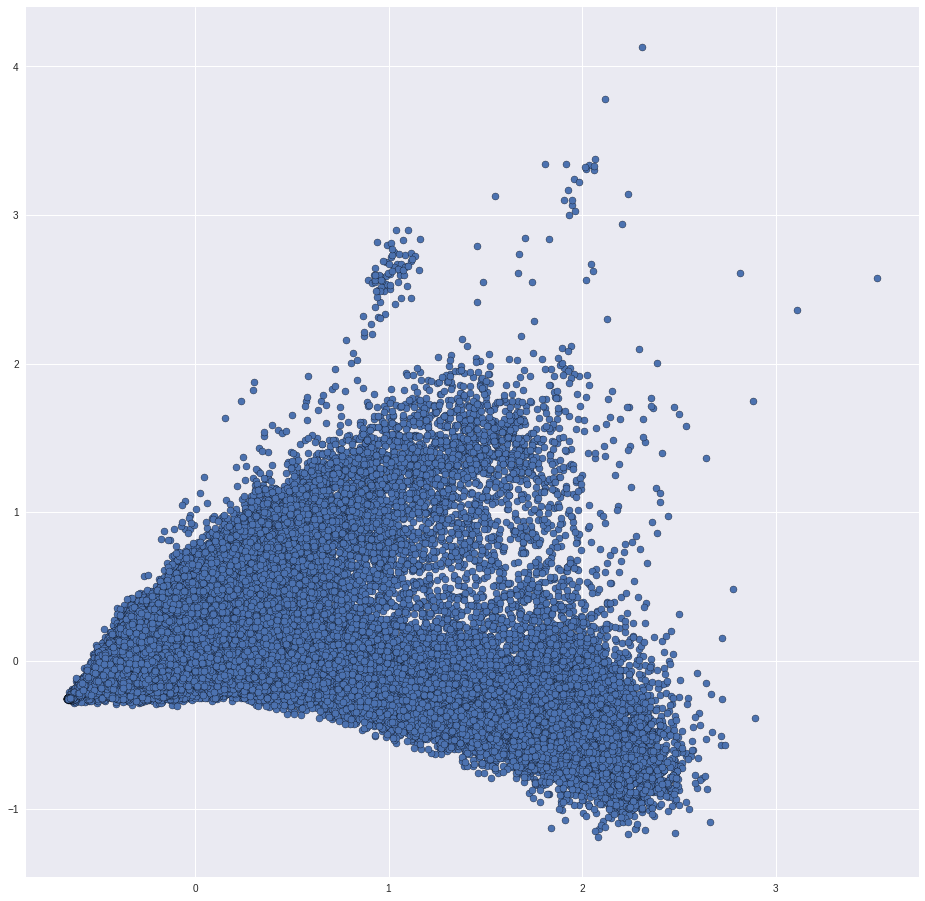

In [27]:
words = list(skip_gram.wv.vocab)
plt.figure(figsize=(16,16))
plt.scatter(x,y, edgecolors='black')
plt.show()

# Top 10 most similar words

In [22]:
skip_gram.wv.most_similar(positive=w1, topn=10)

[('anxiety', 0.8812117576599121),
 ('depressive', 0.8746366500854492),
 ('schizophrenia', 0.843172013759613),
 ('obsessive-compulsive', 0.8284189701080322),
 ('melancholia', 0.826992928981781),
 ('psychotic', 0.8180265426635742),
 ('catatonia', 0.8162171840667725),
 ('adhd', 0.8146804571151733),
 ('anorexia', 0.8121451139450073),
 ('chronic', 0.8109234571456909)]

# Comparison of Cosine Similarities

In [23]:
print("Cosine similarity between 'suicide' " + "and 'depression' - CBOW: ", CBOW.similarity('suicide', 'depression'))
print("Cosine similarity between 'suicide' " + "and 'depression' - Skip Gram: ", skip_gram.similarity('suicide', 'depression'))

Cosine similarity between 'suicide' and 'depression' - CBOW:  0.7130271629447795
Cosine similarity between 'suicide' and 'depression' - Skip Gram:  0.745102312023423
